<a href="https://colab.research.google.com/github/VitaliKrukh/ANN_Regression/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [0]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

**Нормализация данных**

In [0]:
# average value
mean = x_train.mean(axis=0)
# standard deviation
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

**Графики зависимости цены от i-й координаты вектора x**



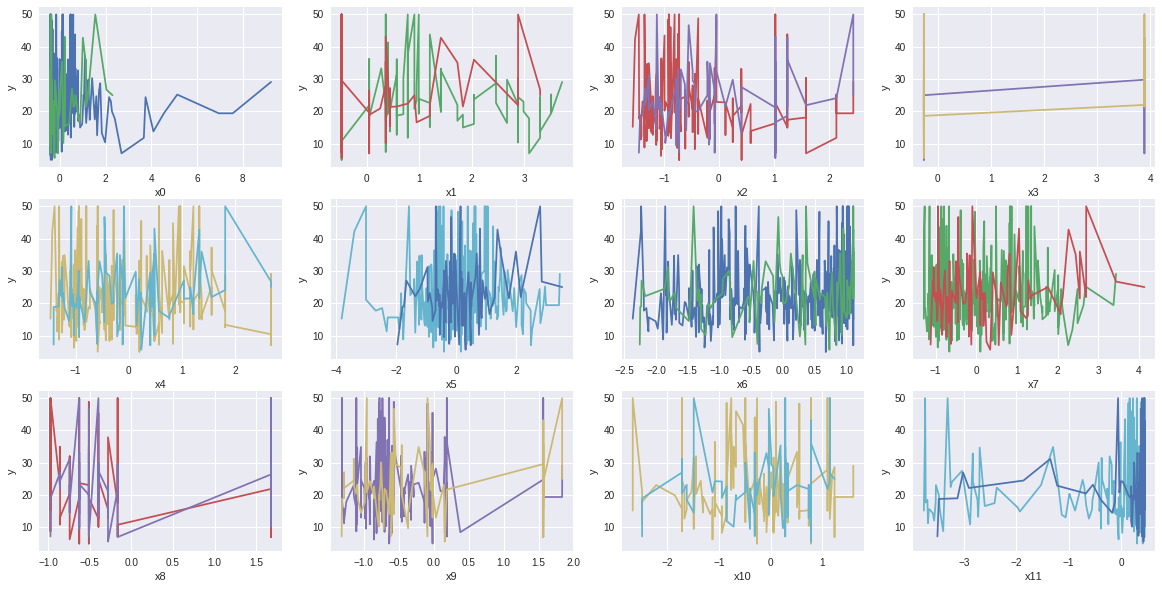

In [57]:
plt.figure(figsize=(20,10))
for i in range(0,12):
  plt.subplot(3, 4, i+1)
  plt.plot(np.sort(x_train[:, i]), y_train, 'C' + str(i%6))   #train data 
  plt.plot(np.sort(x_test[:, i]), y_test, 'C' + str((i+1)%6)) #test data
  plt.xlabel('x' + str(i))
  plt.ylabel('y')
  
  


**Структура модели и её компиляция**

In [0]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.25))
model.add(Dense(230))
model.add(Dropout(0.25))
model.add(Dense(150))
model.add(Dropout(0.25))
model.add(Dense(62))
model.add(Dropout(0.25))
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adadelta', loss='mse', metrics=['mae'])

**Обучение**

In [63]:
model.fit(x_train, y_train, epochs=70, batch_size=35, verbose=1)



Epoch 1/70
404/404 [==============================] - 0s 146us/step - loss: 11.5983 - mean_absolute_error: 2.5107
Epoch 2/70
404/404 [==============================] - 0s 131us/step - loss: 11.7523 - mean_absolute_error: 2.5478
Epoch 3/70
404/404 [==============================] - 0s 139us/step - loss: 12.5083 - mean_absolute_error: 2.5453
Epoch 4/70
404/404 [==============================] - 0s 138us/step - loss: 12.4582 - mean_absolute_error: 2.5653
Epoch 5/70
404/404 [==============================] - 0s 134us/step - loss: 11.5271 - mean_absolute_error: 2.5463
Epoch 6/70
404/404 [==============================] - 0s 137us/step - loss: 13.9530 - mean_absolute_error: 2.6234
Epoch 7/70
404/404 [==============================] - 0s 142us/step - loss: 11.7144 - mean_absolute_error: 2.5343
Epoch 8/70
404/404 [==============================] - 0s 128us/step - loss: 12.2415 - mean_absolute_error: 2.5054
Epoch 9/70
404/404 [==============================] - 0s 134us/step - loss: 13.2989 - me

In [64]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)

print("Mean Absolute Error :", mae)

Mean Absolute Error : 2.220520585191016


In [65]:
pred = model.predict(x_test)
for i in range(0,30):
  print(str(i) + ". Predicted cost:", pred[i][0], ", real cost :", y_test[i])

0. Predicted cost: 7.365404 , real cost : 7.2
1. Predicted cost: 17.681606 , real cost : 18.8
2. Predicted cost: 21.372984 , real cost : 19.0
3. Predicted cost: 35.406693 , real cost : 27.0
4. Predicted cost: 23.617903 , real cost : 22.2
5. Predicted cost: 23.08755 , real cost : 24.5
6. Predicted cost: 28.651632 , real cost : 31.2
7. Predicted cost: 22.098978 , real cost : 22.9
8. Predicted cost: 19.31336 , real cost : 20.5
9. Predicted cost: 19.70152 , real cost : 23.2
10. Predicted cost: 16.335197 , real cost : 18.6
11. Predicted cost: 16.307606 , real cost : 14.5
12. Predicted cost: 15.834387 , real cost : 17.8
13. Predicted cost: 43.45906 , real cost : 50.0
14. Predicted cost: 20.246653 , real cost : 20.8
15. Predicted cost: 21.456812 , real cost : 24.3
16. Predicted cost: 24.950254 , real cost : 24.2
17. Predicted cost: 19.763311 , real cost : 19.8
18. Predicted cost: 17.21917 , real cost : 19.1
19. Predicted cost: 18.73905 , real cost : 22.7
20. Predicted cost: 12.209438 , real c